In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
def plot(variable, y_max):
    plt.hist(variable, bins=50)
    plt.vlines(np.mean(variable), 0, y_max, linestyles="dashed")
    plt.vlines(np.std(variable), 0, y_max)
    plt.legend(["mean", "standard deviation"])
    plt.show()

In [3]:
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10,0.5, 10000) 
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

In [8]:
print("Mean of sample 1: {}\nMean of sample 2: {}".format(sample1.mean(), sample2.mean()))
print("Standard Deviation of sample 1: {}\nStandard Deviation of sample 2: {}".format(sample1.std(), sample2.std()))

Mean of sample 1: 2.0
Mean of sample 2: 5.2
Standard Deviation of sample 1: 1.2165525060596438
Standard Deviation of sample 2: 1.4628738838327795


Personally I think that if we increase our sample size by a factor of 10, we should see the statistics converge to the true statistics of our population. Because sampling is random, we will get different samples however we are still increasing the sample size so this should not have that much of an impact.

In [31]:
sample3 = np.random.choice(pop1, 1000, replace=True)
sample4 = np.random.choice(pop2, 1000, replace=True)

In [32]:
print("Mean of sample 1: {}\nMean of sample 2: {}".format(sample3.mean(), sample4.mean()))
print("Standard Deviation of sample 1: {}\nStandard Deviation of sample 2: {}".format(sample3.std(), sample4.std()))

Mean of sample 1: 2.027
Mean of sample 2: 4.956
Standard Deviation of sample 1: 1.282291308556679
Standard Deviation of sample 2: 1.5975180750151154


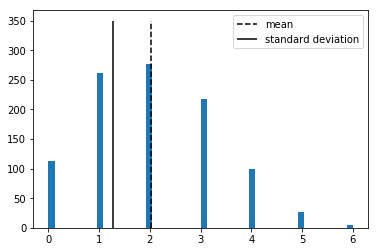

In [33]:
plot(sample3,350)

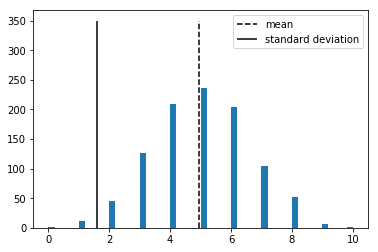

In [34]:
plot(sample4,350)

In [35]:
sample3 = np.random.choice(pop1, 20, replace=True)
sample4 = np.random.choice(pop2, 20, replace=True)

In [36]:
print("Mean of sample 1: {}\nMean of sample 2: {}".format(sample3.mean(), sample4.mean()))
print("Standard Deviation of sample 1: {}\nStandard Deviation of sample 2: {}".format(sample3.std(), sample4.std()))

Mean of sample 1: 1.75
Mean of sample 2: 4.65
Standard Deviation of sample 1: 1.5124483462254175
Standard Deviation of sample 2: 1.4585952145814822


As mentioned above, because of the random nature of sampling, we will get different samples every time. With that being said though, we see little change in both statistics when we increase the sample size and as expected, more significant change when we substantially decrease the sample size. 

In [43]:
pop1 = np.random.binomial(10, 0.3, 10000)
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)
diff=sample2.mean( ) -sample1.mean()

In [44]:
# SE
size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5  

#The difference between the means divided by the standard error: T-value.  
print(diff/diff_se)

10.522209314470949


In [45]:
from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=10.469466078504855, pvalue=1.8413062456235285e-20)


In [46]:
pop1 = np.random.binomial(10, 0.4, 10000)
sample1 = np.random.choice(pop1, 100, replace=True)

In [47]:
# SE
size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5  

#The difference between the means divided by the standard error: T-value.  
print(diff/diff_se)

9.540789125127652


In [48]:
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=5.993254602687603, pvalue=9.585008177385847e-09)


Increasing p (the probability of a success) from 0.3 to 0.4 should decrease the difference in the 2 means (as we are now approaching p=0.5 in the second population), which we show above empirically.